## Criando um Translator usando Azure AI Services

Primeiro abra um recursos Trasnlator em uma região que você tenha permissão:

1. Acesse o portal do Azure - procure pelo serviço de **Translator** (Tradutores)

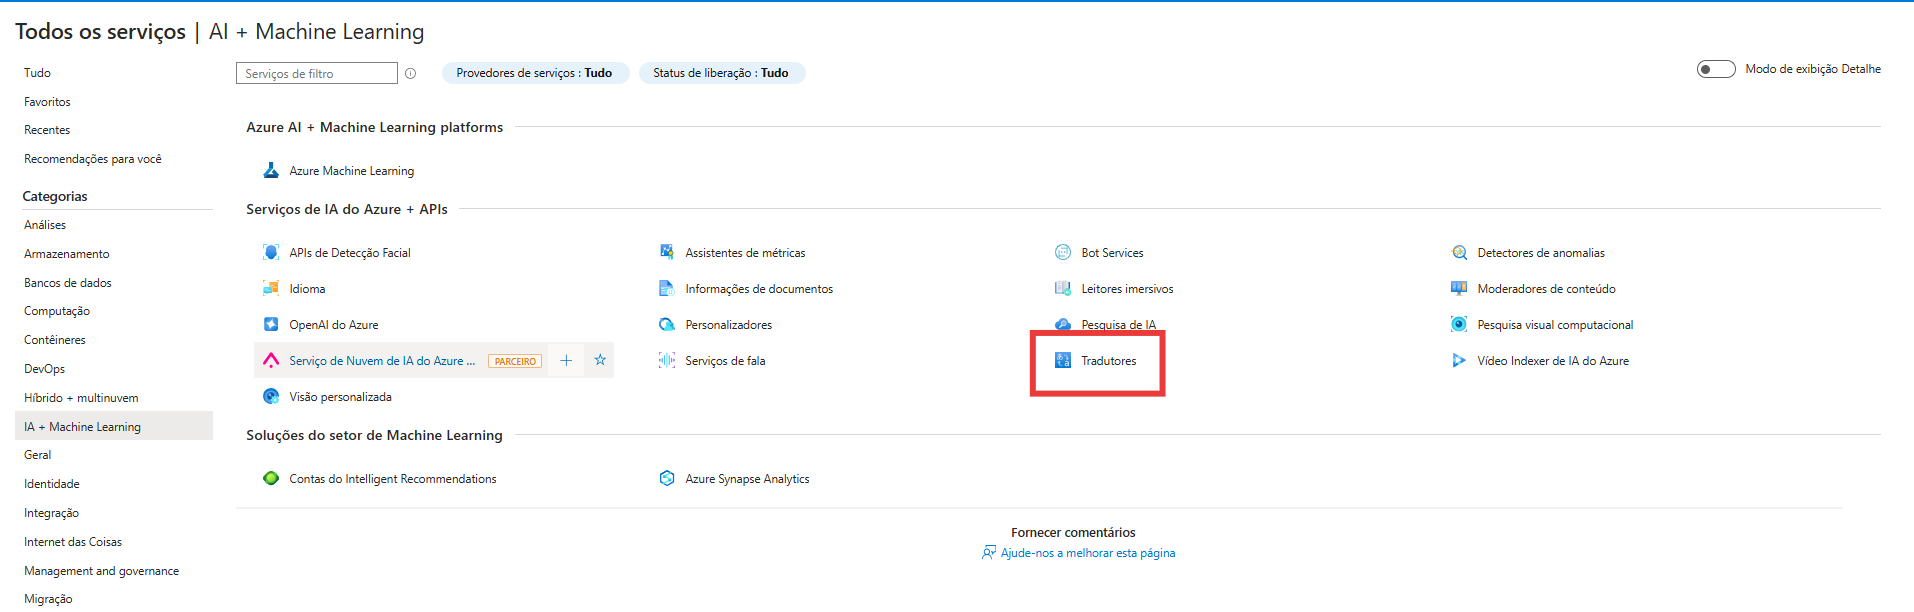

2. Selecione o Tradutor e clique em **Criar Tradutor**
3. Crie um grupo de recursos
4. Selecione uma região com base na politica da sua assinatura
5. Adicione um nome
6. Escolha a opçao Free F0 para seu recurso
  - Mais detalhes sobre as camadas e preços para serviço de tradução [Preços](https://azure.microsoft.com/pt-br/pricing/details/cognitive-services/translator/#pricing)

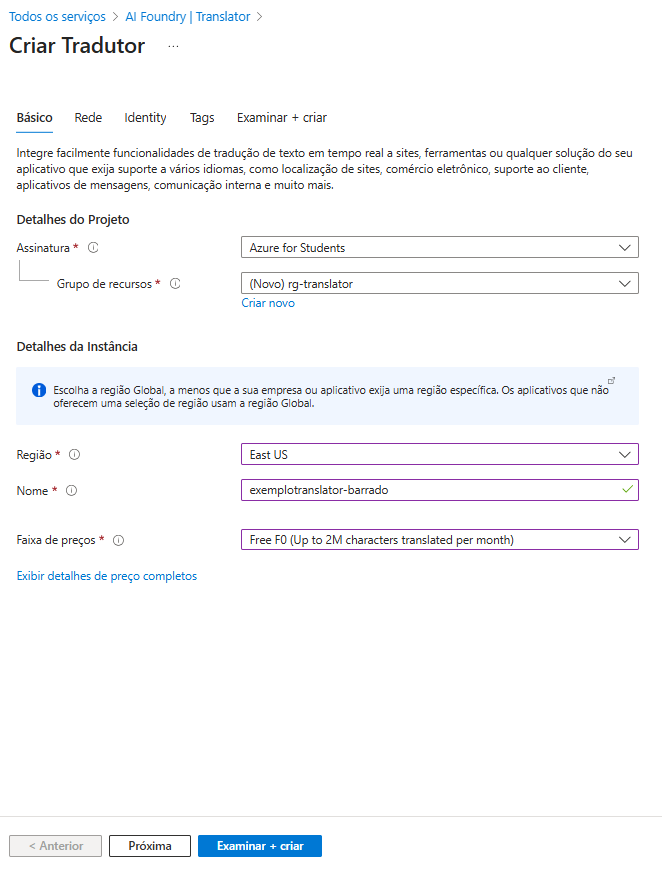

## Criando um recurso OpenAI

1. Selecione o serviço **Azure OpenAI**

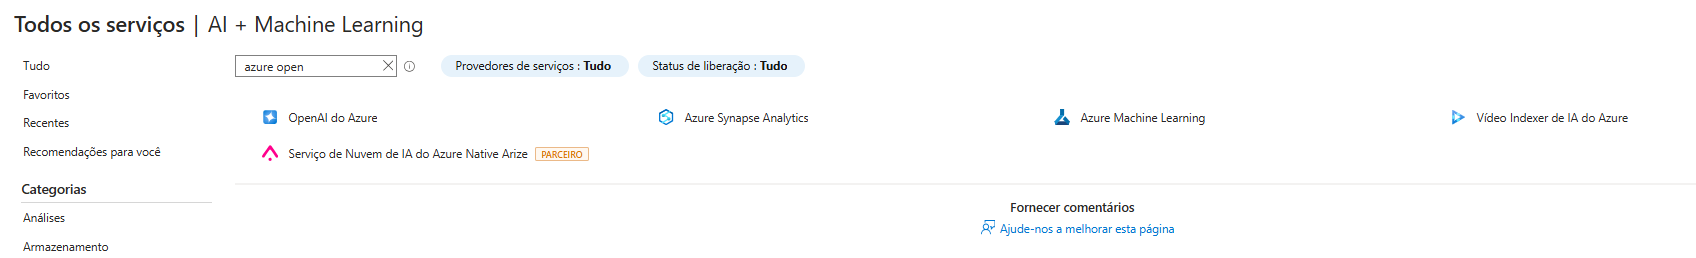

2. Clique em **Create**
3. Selecione o Grupo de Recursos
4. Escolha a mesma região do Translator
5. Adicione o nome
6. Selecione a Faixa de preços S0


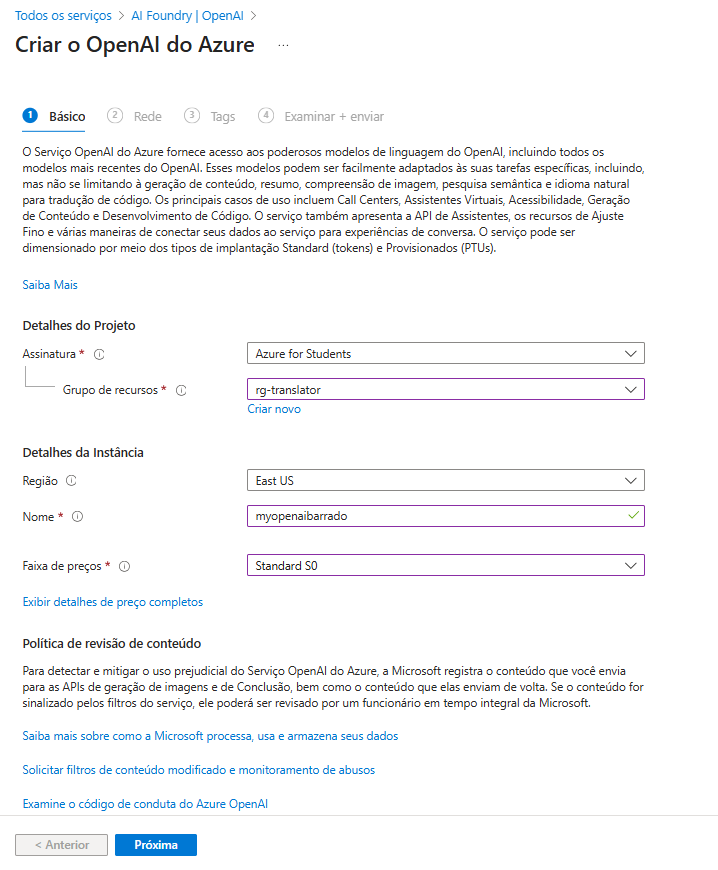

- Preços para OpenAI: [Preços](https://azure.microsoft.com/pt-br/pricing/details/cognitive-services/openai-service/#pricing)

## Configuração OpenAI

1. Abra o Estudio: [AI Azure](https://ai.azure.com/)
2. Clique na guia ao lado esquerdo da tela - Recursos Compartilhados - Implantações

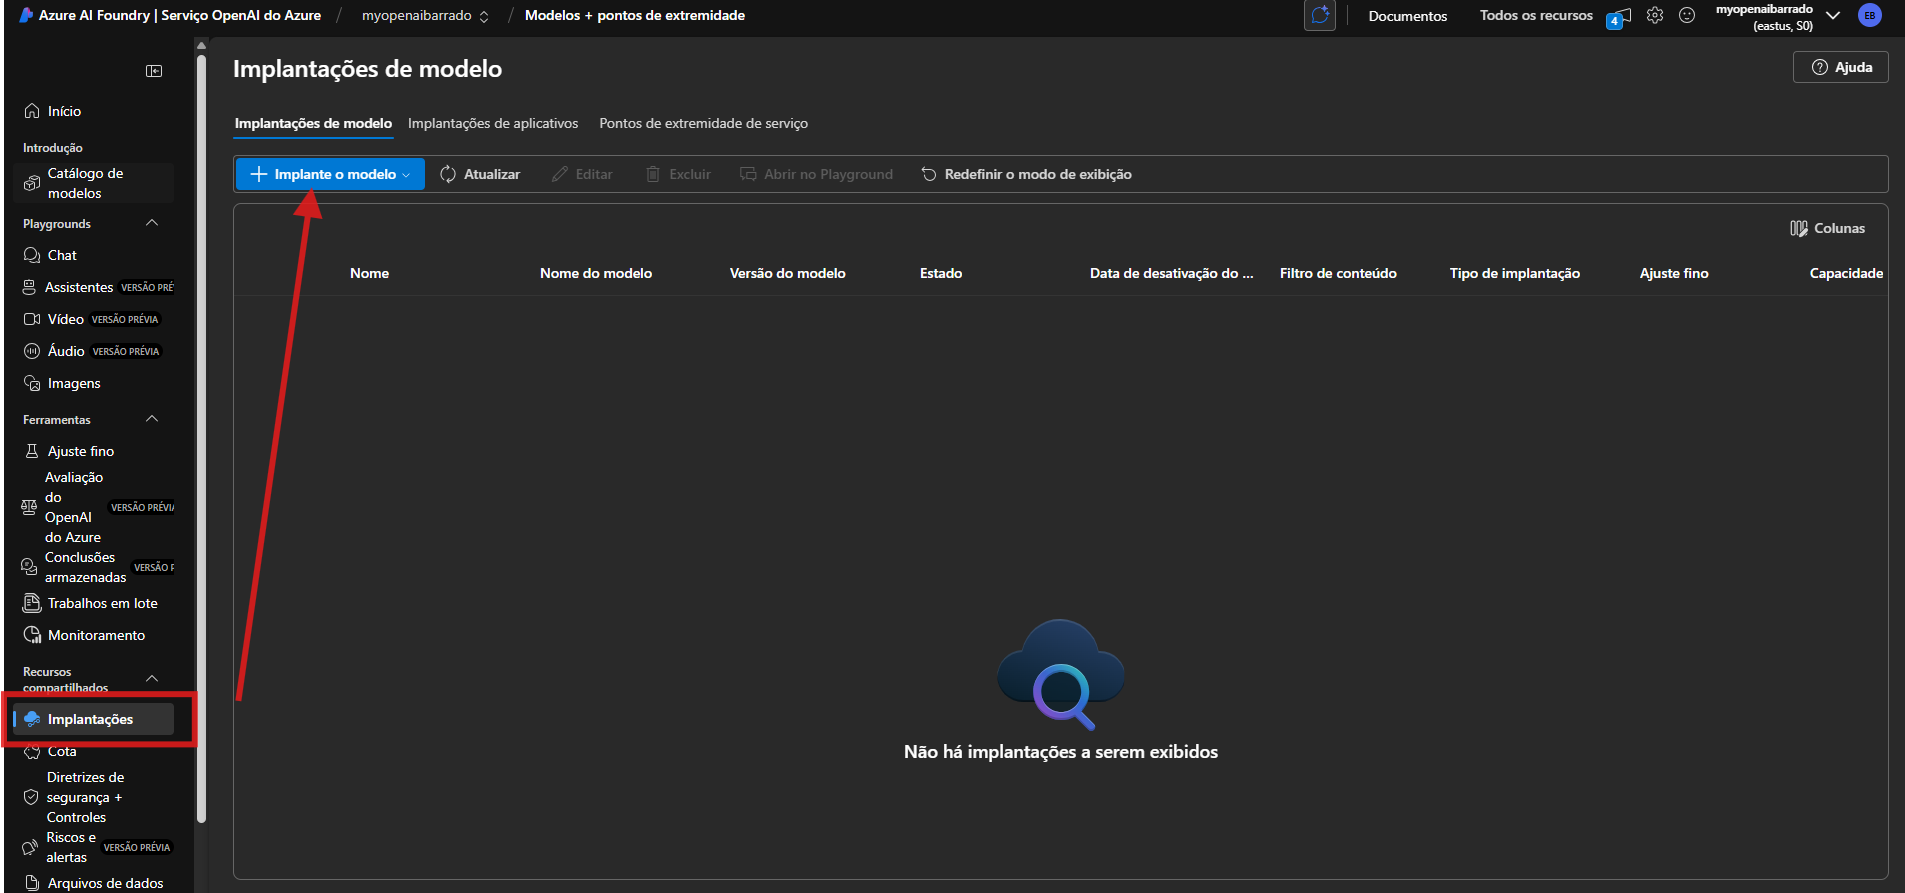

3. Clique em Implantar o modelo
4. Implantação modelo básico
5. Selecione - gpt-4o-mini

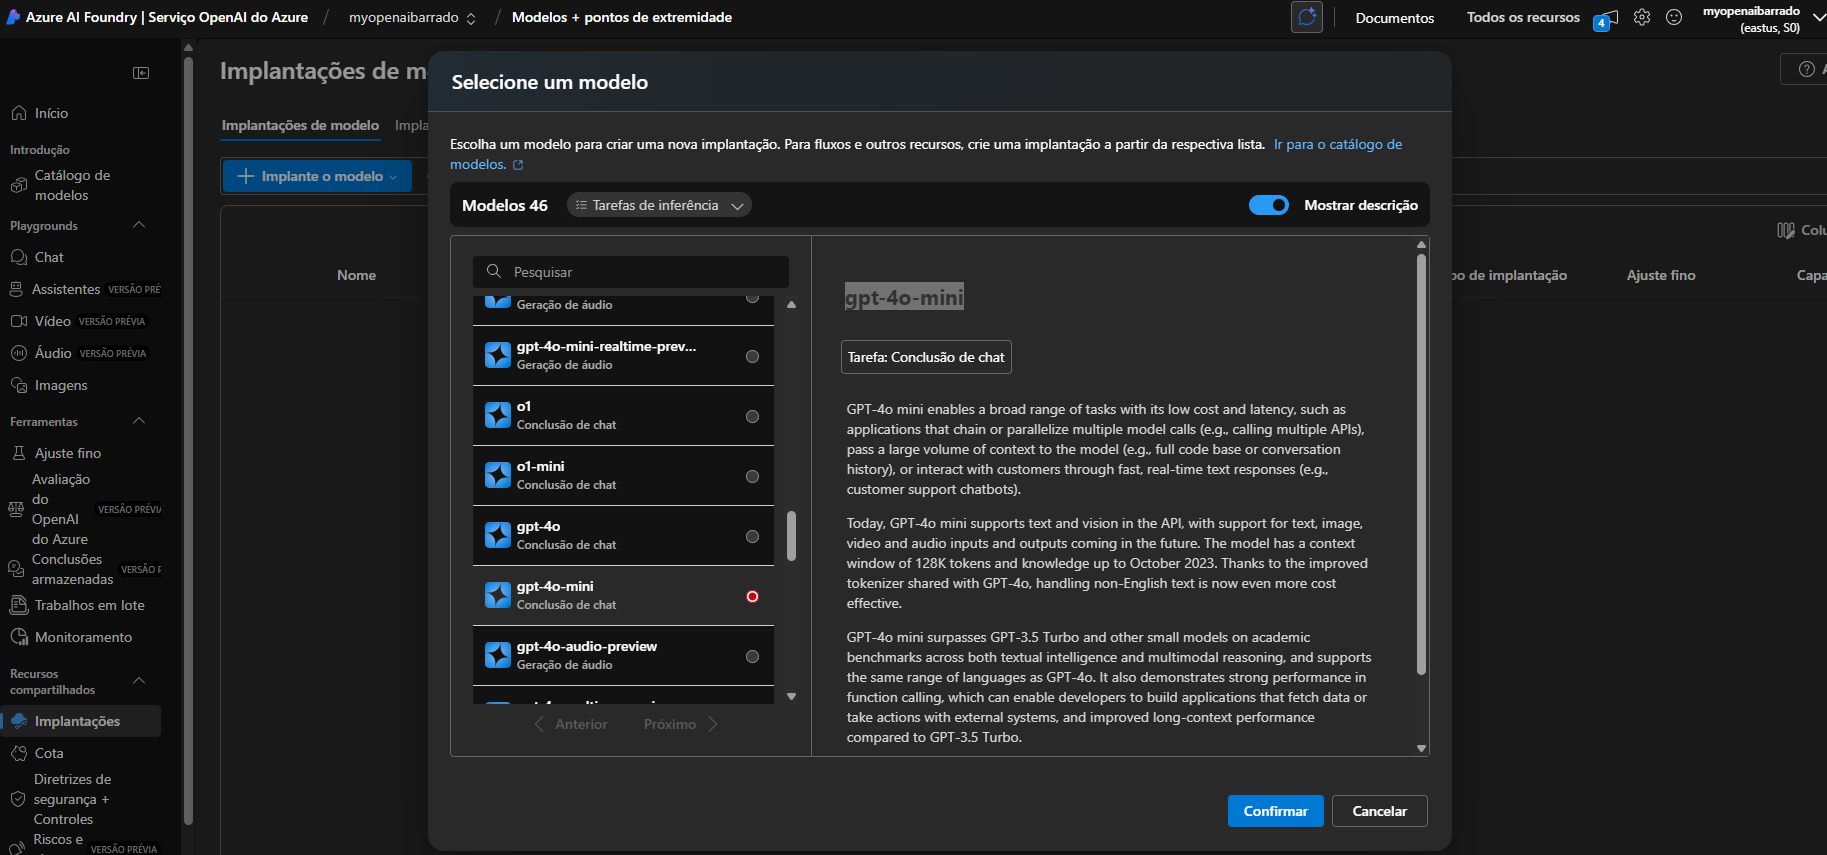


6. Clique em confirmar
7. O nome pode deixar o mesmo
8. Em tipo de Implantação escolha: Global Standard

9. Acesse o site: https://dev.to/
10. Pesquise um artigo que você gosto exemplo: Open AI -  Azure Open AI in VNet.
  - Pegar o arquivo traduzir para português - gerar um markdown

  



In [ ]:
!pip install requests beautifulsoup4 openai langchain-openai

In [ ]:
# extrair o texto

import requests
from bs4 import BeautifulSoup

def extrair_texto_para_url(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # lança erro se a resposta não for 200
    soup = BeautifulSoup(response.text, 'html.parser')
    texto = soup.get_text(separator="\n", strip=True)
    return texto

print(extrair_texto_para_url("https://dev.to/kenakamu/azure-open-ai-in-vnet-3alo"))





In [ ]:
## Criando Verificações
## extrair o texto
import requests
from bs4 import BeautifulSoup
# import openai  # só use quando realmente precisar da API
from langchain_openai import OpenAI  # versão correta

def extrair_texto_para_url(url):
    headers = {"User-Agent": "Mozilla/5.0"}  # evita bloqueio de alguns sites
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # remove scripts e estilos
        for script in soup(["script", "style"]):
            script.decompose()

        # extrai e limpa texto
        texto = soup.get_text(separator=' ')
        linhas = (line.strip() for line in texto.splitlines())
        parts = (phrase.strip() for line in linhas for phrase in line.split("  "))
        texto = '\n'.join(phrase for phrase in parts if phrase)
        return texto

    else:
        print(f"Falha ao acessar a URL - Status {response.status_code}")
        return None

# Testando
conteudo = extrair_texto_para_url('https://dev.to/kenakamu/azure-open-ai-in-vnet-3alo')
print(conteudo[:500])  # imprime só os 500 primeiros caracteres



In [ ]:
!pip install langchain langchain_community --upgrade

In [ ]:
from langchain_community.chat_models import AzureChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

client = AzureChatOpenAI(
    deployment_name="gpt-4o-mini",  # nome do deployment exato
    azure_endpoint="ENDPOINT DO SERVIÇO",  # endpoint correto
    openai_api_key="CHAVE DO SERVIÇO",
    openai_api_version="2024-12-01-preview",
    max_retries=0
)

def translate_artigo(text, lang):
    messages = [
        SystemMessage(content="Você atua como tradutor de texto."),
        HumanMessage(content=f"Traduza o seguinte texto para {lang}: {text} e responda em markdown")
    ]

    response = client(messages)
    print(response.content)
    return response.content

# Teste
translate_artigo("Hello by", "Português")


In [ ]:
import requests
from bs4 import BeautifulSoup

def extrair_texto_para_url(url):
    # Faz a requisição HTTP
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Erro ao acessar a URL: {response.status_code}")

    # Analisa o HTML
    soup = BeautifulSoup(response.text, "html.parser")

    # Extrai todo o texto do corpo da página
    texto = soup.get_text(separator="\n")

    # Remove linhas em branco extras
    linhas = [linha.strip() for linha in texto.split("\n") if linha.strip()]
    return "\n".join(linhas)

# Exemplo de uso
url = 'https://dev.to/kenakamu/azure-open-ai-in-vnet-3alo'
text = extrair_texto_para_url(url)
artigo = translate_artigo(text, "pt-br")
print(artigo)
